In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

C:\Users\personal\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the dataset
df = pd.read_csv("C:/Users/personal/Downloads/TSLA.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,84.900002,86.139999,84.342003,86.052002,86.052002,47660500
1,2020-01-03,88.099998,90.800003,87.384003,88.601997,88.601997,88892500
2,2020-01-06,88.094002,90.311996,88.000000,90.307999,90.307999,50665000
3,2020-01-07,92.279999,94.325996,90.671997,93.811996,93.811996,89410500
4,2020-01-08,94.739998,99.697998,93.646004,98.428001,98.428001,155721500
...,...,...,...,...,...,...,...
248,2020-12-24,642.989990,666.090027,641.000000,661.770020,661.770020,22865600
249,2020-12-28,674.510010,681.400024,660.799988,663.690002,663.690002,32278600
250,2020-12-29,661.000000,669.900024,655.000000,665.989990,665.989990,22910800
251,2020-12-30,672.000000,696.599976,668.359985,694.780029,694.780029,42846000


C:\Users\personal\AppData\Local\Temp\ipykernel_1792\2152846107.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\personal\AppData\Local\Temp\ipykernel_1792\2152846107.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))


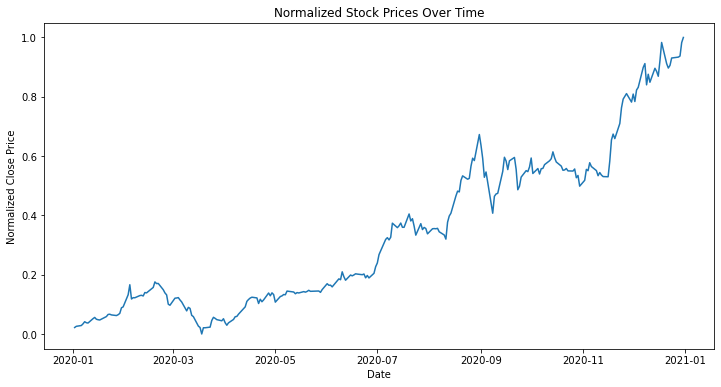

In [3]:
# Remove unnecessary columns
df = df[['Date', 'Close']]

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Sort the data by date (if it's not already sorted)
df.sort_index(ascending=True, inplace=True)

# Normalize the data (scaling to values between 0 and 1)
scaler = MinMaxScaler()
df['Close'] = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Visualize the data
plt.figure(figsize=(12, 6))
plt.title('Normalized Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')
plt.plot(df.index, df['Close'])
plt.show()

In [4]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [5]:
def create_sequences(data, sequence_length):
    sequences = []
    target = []
    
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i:i+sequence_length]
        sequences.append(x)
        target.append(y)
    
    return np.array(sequences), np.array(target)

sequence_length = 10  # Adjust this based on your preference
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

In [6]:
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [7]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
model.fit(X_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
3/3 [==============================] - 10s 39ms/step - loss: 0.0722
Epoch 2/50
3/3 [==============================] - 0s 30ms/step - loss: 0.0253
Epoch 3/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0104
Epoch 4/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0172
Epoch 5/50
3/3 [==============================] - 0s 30ms/step - loss: 0.0094
Epoch 6/50
3/3 [==============================] - 0s 34ms/step - loss: 0.0055
Epoch 7/50
3/3 [==============================] - 0s 34ms/step - loss: 0.0068
Epoch 8/50
3/3 [==============================] - 0s 38ms/step - loss: 0.0058
Epoch 9/50
3/3 [==============================] - 0s 35ms/step - loss: 0.0029
Epoch 10/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0017
Epoch 11/50
3/3 [==============================] - 0s 28ms/step - loss: 0.0024
Epoch 12/50
3/3 [==============================] - 0s 29ms/step - loss: 0.0014
Epoch 13/50
3/3 [==============================] - 0s 29ms/s

In [9]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')

Test Loss: 0.0021888702176511288


In [10]:
y_pred = model.predict(X_test)

2/2 [==============================] - 2s 8ms/step


In [11]:
y_pred = model.predict(X_test)

2/2 [==============================] - 0s 11ms/step


In [12]:

y_pred

array([[0.54450864],
       [0.541768  ],
       [0.5399605 ],
       [0.5398646 ],
       [0.54152316],
       [0.54328257],
       [0.5436285 ],
       [0.5462706 ],
       [0.54744804],
       [0.55073154],
       [0.5512935 ],
       [0.5505838 ],
       [0.55527705],
       [0.5623543 ],
       [0.5733201 ],
       [0.5894142 ],
       [0.6117443 ],
       [0.6373227 ],
       [0.66682076],
       [0.696793  ],
       [0.7269967 ],
       [0.7507644 ],
       [0.7684827 ],
       [0.7848478 ],
       [0.80538654],
       [0.8237034 ],
       [0.83575326],
       [0.8455816 ],
       [0.8527265 ],
       [0.8633823 ],
       [0.8716061 ],
       [0.8809614 ],
       [0.8882218 ],
       [0.89843786],
       [0.9024919 ],
       [0.9048129 ],
       [0.9129014 ],
       [0.91818565],
       [0.9260301 ],
       [0.929954  ],
       [0.93697876]], dtype=float32)

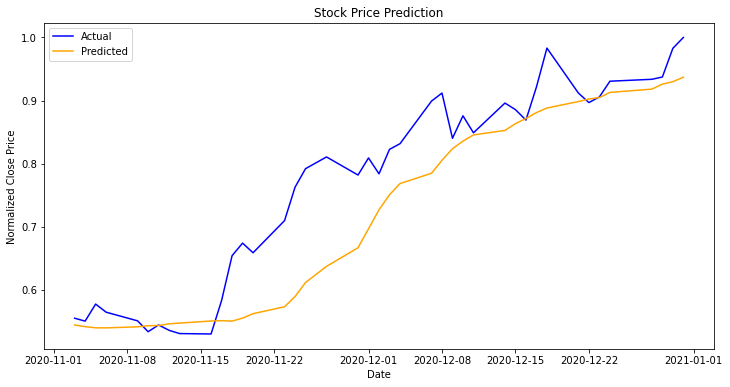

In [13]:
plt.figure(figsize=(12, 6))
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Normalized Close Price')

# Plot the actual stock prices
plt.plot(test_data.index[sequence_length:], test_data['Close'][sequence_length:], label='Actual', color='blue')

# Plot the predicted stock prices
plt.plot(test_data.index[sequence_length:], y_pred, label='Predicted', color='orange')

plt.legend()
plt.show()